> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Assignment 2

**Handin in Peergrade**: *Wednesday*, April 4, 2018, 23:59<br>
**Peergrading deadline**: *Sunday*, April 8, 2018, 23:59<br>
**Peergrading feedback deadline**: *Wednesday*, April 11, 2018, 23:59

[**Questions**](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) **/** [**Feedback**](http://ulfaslak.com/vent)

## Problems

### Week 6

> **Ex. 6.0.1**: List three different real networks and state the nodes and links for each of them.

Transportation Networks:

    nodes: airports
    links: flights
    
Communication networks:

    nodes: phone number
    links: phone calls

Social Network:

    nodes: individuals
    links: sexual partners

> **Ex. 6.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

In any large corporation, each node, or employee, has many links. I would argue, however, that a professional network is sparse because each individual will never be connected to every member of the large company. The  owners/managers, the first nodes in the network, must connect with the next branch of workers directly below them. Then, these next level nodes become responsible for connecting with both their managers and the people below them in order to communicate. This pattern extends all the way to the entry level workers, creating a massive professional network. Yet again, the network is sparse because there will never be connections between every employee at all levels.

> **Ex. 6.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

**Describing and Creating a BA network**

A BA network is a scale free network. A scale free network contains nodes that act as hubs. These hubs accumulate very high degrees of connectivity. As the network gets bigger, these nodes will accumulate more and more connections while the less connected nodes keep a relatively constant amount of connections. They follow a power law degree distribution. This just means some nodes have a lot more degrees than others. These networks are characterized by continued growth in the number of nodes and preferential attachment - new nodes want to connect to heavily connected nodes.

To create a BA network, you start with a m nodes. The edges are chosen randomly, similar to an ER network. However, every node must have at least one edge. Then, the network continuously grows. You select a time interval and then at each time interval you add a new node. Then you add edges for the new node weighting each old node's edge probability  with how many connections it has. This favors nodes with higher degrees.

** Generating a BA network **

In [1]:
import networkx as nx # import networkx package

In [2]:
ba = nx.barabasi_albert_graph(100, 2) # 100 nodes and 2 new edges from each new node

** Plot the Network **

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':
/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


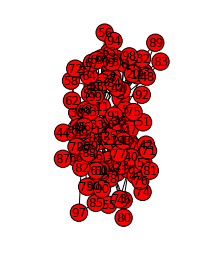

In [4]:
plt.subplot(121)
nx.draw(ba, with_labels=True)

** Degree Distribution Visualization **

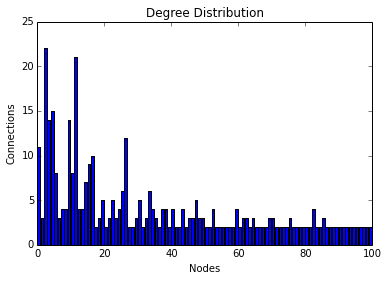

In [5]:
degrees = dict(nx.degree(ba))
plt.bar(degrees.keys(), degrees.values())
plt.title("Degree Distribution")
plt.ylabel("Connections")
plt.xlabel("Nodes")
plt.show()

** Differences between BA and the ER Networks **

The BA graph is skewed right while the ER graph is more randomly scattered. In the BA graph, the range between the smallest and largest node is about 23 edges while in the ER graph it is about 13 edges.

** Other Network Measures **

We could use the probability that an edge receives a node as a function of time for the BA graph.

> **Ex: 6.2.2**: Create a `networkx.Graph` that represents each partnership between characters, as an edge. Print the number of nodes, edges and average degree of the resulting network.

In [6]:
# ***** Helper Function *****
import os, re
## Gets the list of partners for a given character
def get_partners(character_name):
    ## Find character in the folders
    for faction in ["heroes", "ambiguous", "villains"]:
        faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
        if character_name in faction_chars:
            break
    ## Grab markup from file
    with open("../data/%s/%s.txt" % (faction, character_name)) as fp:
        markup = fp.read()    
    ## Use regexs to extract partners     
    partners_field = re.findall(r"partners[\w\W]+?\n", markup)
    if partners_field == []: 
        return [] # return nothing if list is empty
    else:
        return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", partners_field[0][10:])] # format list

In [7]:
pg = nx.Graph()
# Loop through all of the characters
for faction in ["heroes", "ambiguous", "villains"]:
    faction_chars = [c[:-4] for c in os.listdir("../data/%s" % faction)]
    for char in faction_chars:
        if char[0] == ".": continue
        # Create node if necessary
        if char not in list(pg.nodes): pg.add_node(char)
        # Get partners for the char
        partners = get_partners(char)
        # Add corresponding edges ~ avoid repeats
        for p in partners:
            if (p, char) in pg.edges: continue
            pg.add_edge(char, p)
# Print out info
print "Number of nodes: " + str(pg.number_of_nodes())
print "Number of edges: " + str(pg.number_of_edges())
print "Average  degree: " + str(pg.number_of_edges() * 2/float(pg.number_of_nodes()))

Number of nodes: 2181
Number of edges: 469
Average  degree: 0.430077945896


> **Ex: 6.2.3**: Plot the degree distribution of your character network. What type of random network does it resemble?

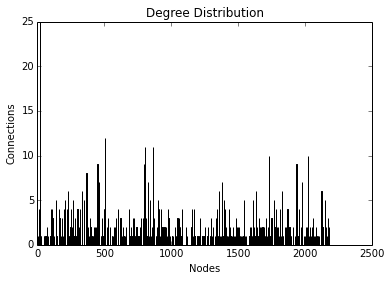

In [8]:
degrees = dict(nx.degree(pg))
plt.bar(range(1, len(degrees.keys())+1), degrees.values())
plt.title("Degree Distribution")
plt.ylabel("Connections")
plt.xlabel("Nodes")
plt.show()

**Resemblence:** It looks very similar to an ER network. Most nodes have between 0 and 12 connections and seem to be randomly dispersed.

> **Ex: 6.2.4**: Create a bar chart (similar in style to the one in Ex. 3.2.1) with the 10 most high-degree characters in each class. Make sure that each subfigure has the same y-axis (control with `plt.ylim` or use `plt.subplots` with parameter `sharey=True`).

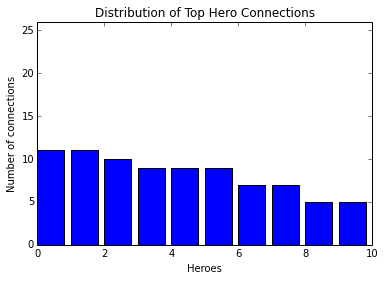

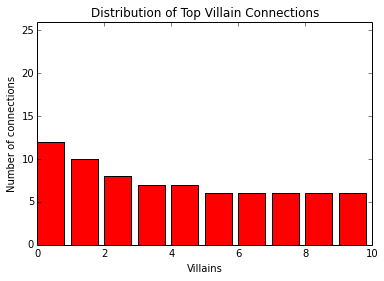

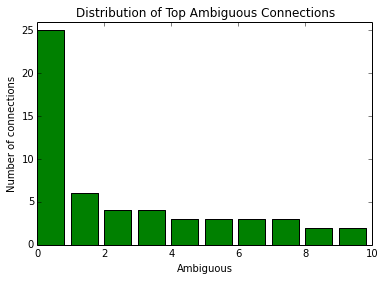

In [9]:
import operator # for sorting a dictionary
## Init lists for each faction
heroes = [c[:-4] for c in os.listdir("../data/heroes")]
villains = [c[:-4] for c in os.listdir("../data/villains")]
ambiguous = [c[:-4] for c in os.listdir("../data/ambiguous")]
## Sort the dictionary of degrees by value
sorted_edge_tuples = sorted(degrees.items(), key=operator.itemgetter(1), reverse=True)
## Init lists of 10 nodes with highest degree for each list for each faction
top_heroes = list()
top_villains = list()
top_ambiguous = list()
## Fill up lists from the dictionary
for char, value in sorted_edge_tuples:
    if char in heroes and len(top_heroes) < 10: 
        top_heroes.append((char, value))
    elif char in villains and len(top_villains) < 10: 
        top_villains.append((char, value))
    elif char in ambiguous and len(top_ambiguous) < 10: 
        top_ambiguous.append((char, value))
    if len(top_heroes) >= 10 and len(top_villains) >= 10 and len(top_ambiguous) >= 10: break
## Get lists of just height
hero_height = [top_hero[1] for top_hero in top_heroes]
villain_height = [top_villain[1] for top_villain in top_villains]
ambi_height = [top_a[1] for top_a in top_ambiguous]
y_max = max([max(hero_height), max(villain_height), max(ambi_height)])
## Plot bar graphs
# Heroes
x_h = range(len(top_heroes))
plt.bar(x_h, hero_height) # create hist
plt.xlabel("Heroes")
plt.ylabel("Number of connections")
plt.title("Distribution of Top Hero Connections")
plt.ylim(0,y_max + 1)
plt.show()
# Villains
x_v = range(len(top_villains))
plt.bar(x_v, villain_height, color="red") # create hist
plt.xlabel("Villains")
plt.ylabel("Number of connections")
plt.title("Distribution of Top Villain Connections")
plt.ylim(0,y_max + 1)
plt.show()
# Ambig
x_a = range(len(top_ambiguous))
plt.bar(x_v, ambi_height, color="green") # create hist
plt.xlabel("Ambiguous")
plt.ylabel("Number of connections")
plt.title("Distribution of Top Ambiguous Connections")
plt.ylim(0,y_max + 1)
plt.show()

### Week 7

>**Ex. 7.1.1**: To make a word cloud you need some more or less clean text. For each character extract as cleanly as you can, the text written on their wikipage. Since the wikidata is kind of messy, there are some things you should be aware of when extracting the text.
* Exclude character names.
* Exclude links.
* Exclude numbers.
* Set everything to lower case.
* Do not include stopwords (use `nltk.corpus.stopwords.words("english")` to get a list of stopwords; install `nltk` to do this).

>Cleaning doesn't have to be perfect and can be done in a many different ways, these are just some things to look out for.

>Once you have extracted the text, create one long text string for all text written about heroes, another long text string for villains, and finally one for ambiguous characters. Using the code snippet below which shows how to plot a word cloud, plot the word clouds for each faction.

>        text = "some cool text"
>        wc = wordcloud.WordCloud(max_font_size=40).generate(text)
>        
>        plt.figure()
>        plt.imshow(wc, interpolation="bilinear")
>        plt.axis("off")
>        plt.show()

> You have to import `matplotlib.pylab` and `wordcloud` to do this. You can install `wordcloud` with anaconda by typing into your console

>        conda install -c conda-forge wordcloud

>or

>        sudo pip install wordcloud

>if you don't have Anaconda installed.

In [10]:
import wordcloud
# Compiles a list of lowercase strings from villain wikipedia pages without characer names, links, and numbers 
vil_texts=[]
for file_name in os.listdir("../data/villains"): 
    if file_name != ".DS_Store":
        with open("../data/villains/" + file_name) as f:
            # use regex to isolate and remove the unwanted portions of each wikipedia page 
            txt=f.read()
            fn=re.sub('.txt','',file_name)#removes .txt predicate of character names and gives name variable title
            fn=fn.lower()# make lowercase
            txt=txt.lower() # make lowercase
            txt=re.sub("fn",'',txt) #excludes character name
            txt=re.sub("\d","", txt) # exclude numbers
            txt=re.sub("((?P<wiki_link>[^]]+?)(\|))?","",txt)#excludes links
            txt=txt.split(' ')
            vil_texts.extend(txt) #append each page's strings to the mass list  

# Do the same for heroes
her_texts=[]
for file_name in os.listdir("../data/heroes"): 
    if file_name != ".DS_Store":
        with open("../data/heroes/" + file_name) as f:
            # use regex to isolate and remove the unwanted portions of each wikipedia page 
            txt=f.read()
            fn=re.sub('.txt','',file_name) #removes .txt predicate of character names and gives name variable title
            txt=txt.lower() # make lowercase
            fn=fn.lower() # make lowercase
            txt=re.sub("fn",'',txt) #excludes character name
            txt=re.sub("\d","", txt) # exclude numbers
            txt=re.sub("\[\[", "", txt)
            txt=re.sub("((?P<wiki_link>[^]]+?)(\|))?","",txt)#excludes links
            txt=txt.split(' ')
            her_texts.extend(txt) #append each page's strings to the mass list  
            
# Do the same for ambiguous 
amb_texts=[]
for file_name in os.listdir("../data/ambiguous"): #this is because the data is back one level
    if file_name != ".DS_Store":
        with open("../data/ambiguous/" + file_name) as f:
            # use regex to isolate and remove the unwanted portions of each wikipedia page 
            txt=f.read()
            fn=re.sub('.txt','',file_name) # removes .txt predicate of character names and gives name variable title
            fn=fn.lower() # make lowercase
            txt=txt.lower() # make lowercase
            txt=re.sub("fn",'',txt) # excludes character name
            txt=re.sub("\d","", txt) # exclude numbers
            txt=re.sub("((?P<wiki_link>[^]]+?)(\|))?","",txt)# excludes links
            txt=txt.split(' ')
            amb_texts.extend(txt) # append each page's strings to the mass list

/usr/local/Cellar/ipython@5/5.5.0_2/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:4: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  after removing the cwd from sys.path.
/usr/local/Cellar/ipython@5/5.5.0_2/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """
/usr/local/Cellar/ipython@5/5.5.0_2/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


Villains Word Cloud


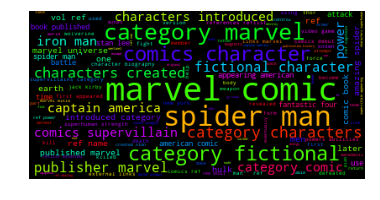

Heroes Word Cloud


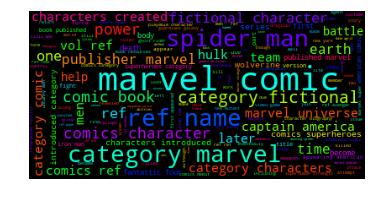

Ambiguous Word Cloud


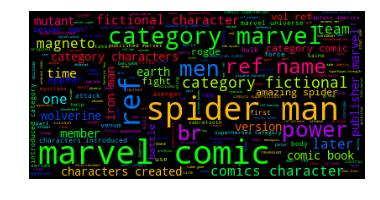

In [11]:
import nltk
stops=nltk.corpus.stopwords.words("english") #list of English stop words   
#Creates a new list of strings for each faction with stop words removed
vil_without_stops= [i for i in vil_texts if i not in stops]
her_without_stops= [i for i in her_texts if i not in stops]
amb_without_stops= [i for i in amb_texts if i not in stops]

wc = wordcloud.WordCloud(max_font_size=40).generate(' '.join(vil_without_stops))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
print('Villains Word Cloud')
plt.show()

wc = wordcloud.WordCloud(max_font_size=40).generate(' '.join(her_without_stops))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
print('Heroes Word Cloud')
plt.show()

wc = wordcloud.WordCloud(max_font_size=40).generate(' '.join(amb_without_stops))
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
print('Ambiguous Word Cloud')
plt.show()


>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

In [13]:
import afinn
from afinn import Afinn
import matplotlib.pyplot as plt
afinn = Afinn() 

vil_scores=[]
for text in vil_without_stops:
    vil_sent=afinn.score(str(text))
    vil_scores.append(vil_sent)
    
her_scores=[]
for text in her_without_stops:
    her_sent=afinn.score(str(text))
    her_scores.append(her_sent)
    
amb_scores=[]
for text in amb_without_stops:
    amb_sent=afinn.score(str(text))
    amb_scores.append(amb_sent)
    
# work with bin width
import numpy as np
plt.hist(vil_scores, bins=np.arange(-5, 5 + 0.5, 0.5), color='red')
plt.title("Sentiment Analysis Scores of Villains")
plt.xlabel("Score")
plt.ylabel("Frequency")
print("Villains")
plt.show()

plt.hist(her_scores, bins=np.arange(-5, 5 + 0.5, 0.5), color='red')
plt.title("Sentiment Analysis Scores of Heroes")
plt.xlabel("Score")
plt.ylabel("Frequency")
print("Heroes")
plt.show()

plt.hist(amb_scores, bins=np.arange(-5, 5 + 0.5, 0.5), color='green')
plt.title("Sentiment Analysis Scores of Ambiguous")
plt.xlabel("Score")
plt.ylabel("Frequency")
print("Ambiguous")
plt.show()

ImportError: No module named afinn

### Week 8

>**Ex. 8.2.1**: Modify the script from Ex. 8.1.1 so that it instead of word counts outputs the number of characters, words and lines in the file. Post as your answer in two seperate cells, (1) the code in the script in a code cell, and (2) the terminal output in a markdown cell with the text indented by one tab.

In [ ]:
from mrjob.job import MRJob

class MRWordCounter(MRJob):  
    def mapper(self, _, line):
        for char in line:
            yield 'char', 1
        for word in line.split():
            yield 'word', 1
        yield 'lines', 1
        
    def reducer(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    MRWordCounter.run()

    // terminal
    (C:\Users\Administrator\Anaconda2) D:\DIS\bigdata\exercises>python 8.2.1.py week8.txt
    No configs found; falling back on auto-configuration
    No configs specified for inline runner
    Running step 1 of 1...
    Creating temp directory c:\users\admini~1\appdata\local\temp\8.Administrator.20180404.153524.214000
    Streaming final output from c:\users\admini~1\appdata\local\temp\8.Administrator.20180404.153524.214000\output...
    "char"  88
    "lines" 4
    "word"  21
    Removing temp directory c:\users\admini~1\appdata\local\temp\8.Administrator.20180404.153524.214000...
    // end terminal

    // end 8.2.1

>**Ex. 8.2.4**: We can go even further! Let's add a third MapReduce step to count the number of triangles in a network. Again use this input data:

>        A B
>        A C
>        A D
>        B C
>        B D
>        B E
>        C D
>        C E
>        D E

>to validate that your implementation works. It should produce 7 triangles.

>1. Now compute the number of triangles in [this file](http://snap.stanford.edu/data/facebook_combined.txt.gz) which contains 88234 links in an anonymized facebook network. Don't print the whole output, just report the number you get.
>2. Do the same instead using all 2766607 road segments in California as your input. Go to [this site](https://www.cise.ufl.edu/research/sparse/matrices/SNAP/roadNet-CA.html) and download the data in Matrix Market format (`.mtx`). Unzip the file and remove the first 50 lines from it, since that is just markup that we don't need. The file is pretty big so you can expect it to take some time (~4 minutes on my computer). Report the number you get.

>*Hint: Counting triangles is equivalent to counting "common friends". One way to do that is to just count the collective number of common friends that exist in a network. Depending on your implementation you might want to correct your result by a factor 3, since it is likely that you end up counting each triangle three times (one for each point in it).*

>*Nerdy sidenote: Why would anyone want to count triangles??? Well, in network science there is a lot of statistical measures that include the count of triangles in a network. For example, the [clustering coefficient](https://en.wikipedia.org/wiki/Clustering_coefficient), which reveals how interconnected a network is, is computed as the number of realized triangles divided by the number of possible triangles.*